In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [448]:
data = pd.read_csv('concrete.csv')

In [449]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [450]:
#Can't really tell much with this info as I do not understand fully how each feature should behave. The good news is there is no negative numbers
#Because these are measurements of things the zeros make sense as minimums. 
#the age seems to have some outliers as the max is very far from the mean and median. Same with slag. 
#Water and superplastic (all have high amounts) have low standard deviation which means the data points are all close together. 

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [452]:
#it shows there are no null values and all values are quantitative. 

In [453]:
ind = data[data.duplicated() == True].index
data.drop(index = ind, inplace=True)

In [454]:
data.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

In [455]:
#only the age seems to have a large skew.

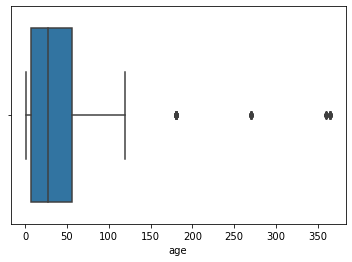

In [456]:
sns.boxplot(data['age'])
plt.show()

In [457]:
#there are a couple outliers.

In [458]:
data[data['age']>150]['age'].count() #number of outliers. This is about .057% of the data so it might be ok to drop them or replace with median.

59

In [459]:
median = data.age.median()
values = list(data[data.age>150]['age'])
data['age'] = data.age.replace(values,median)

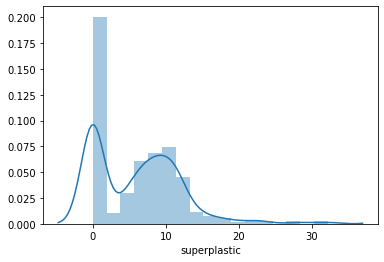

In [460]:
sns.distplot(data['superplastic']) #there are a lot of zeros so I might want to generate synthetic datapoints to overcome this. Might come back later if model is not accurate.
#might do some binning.

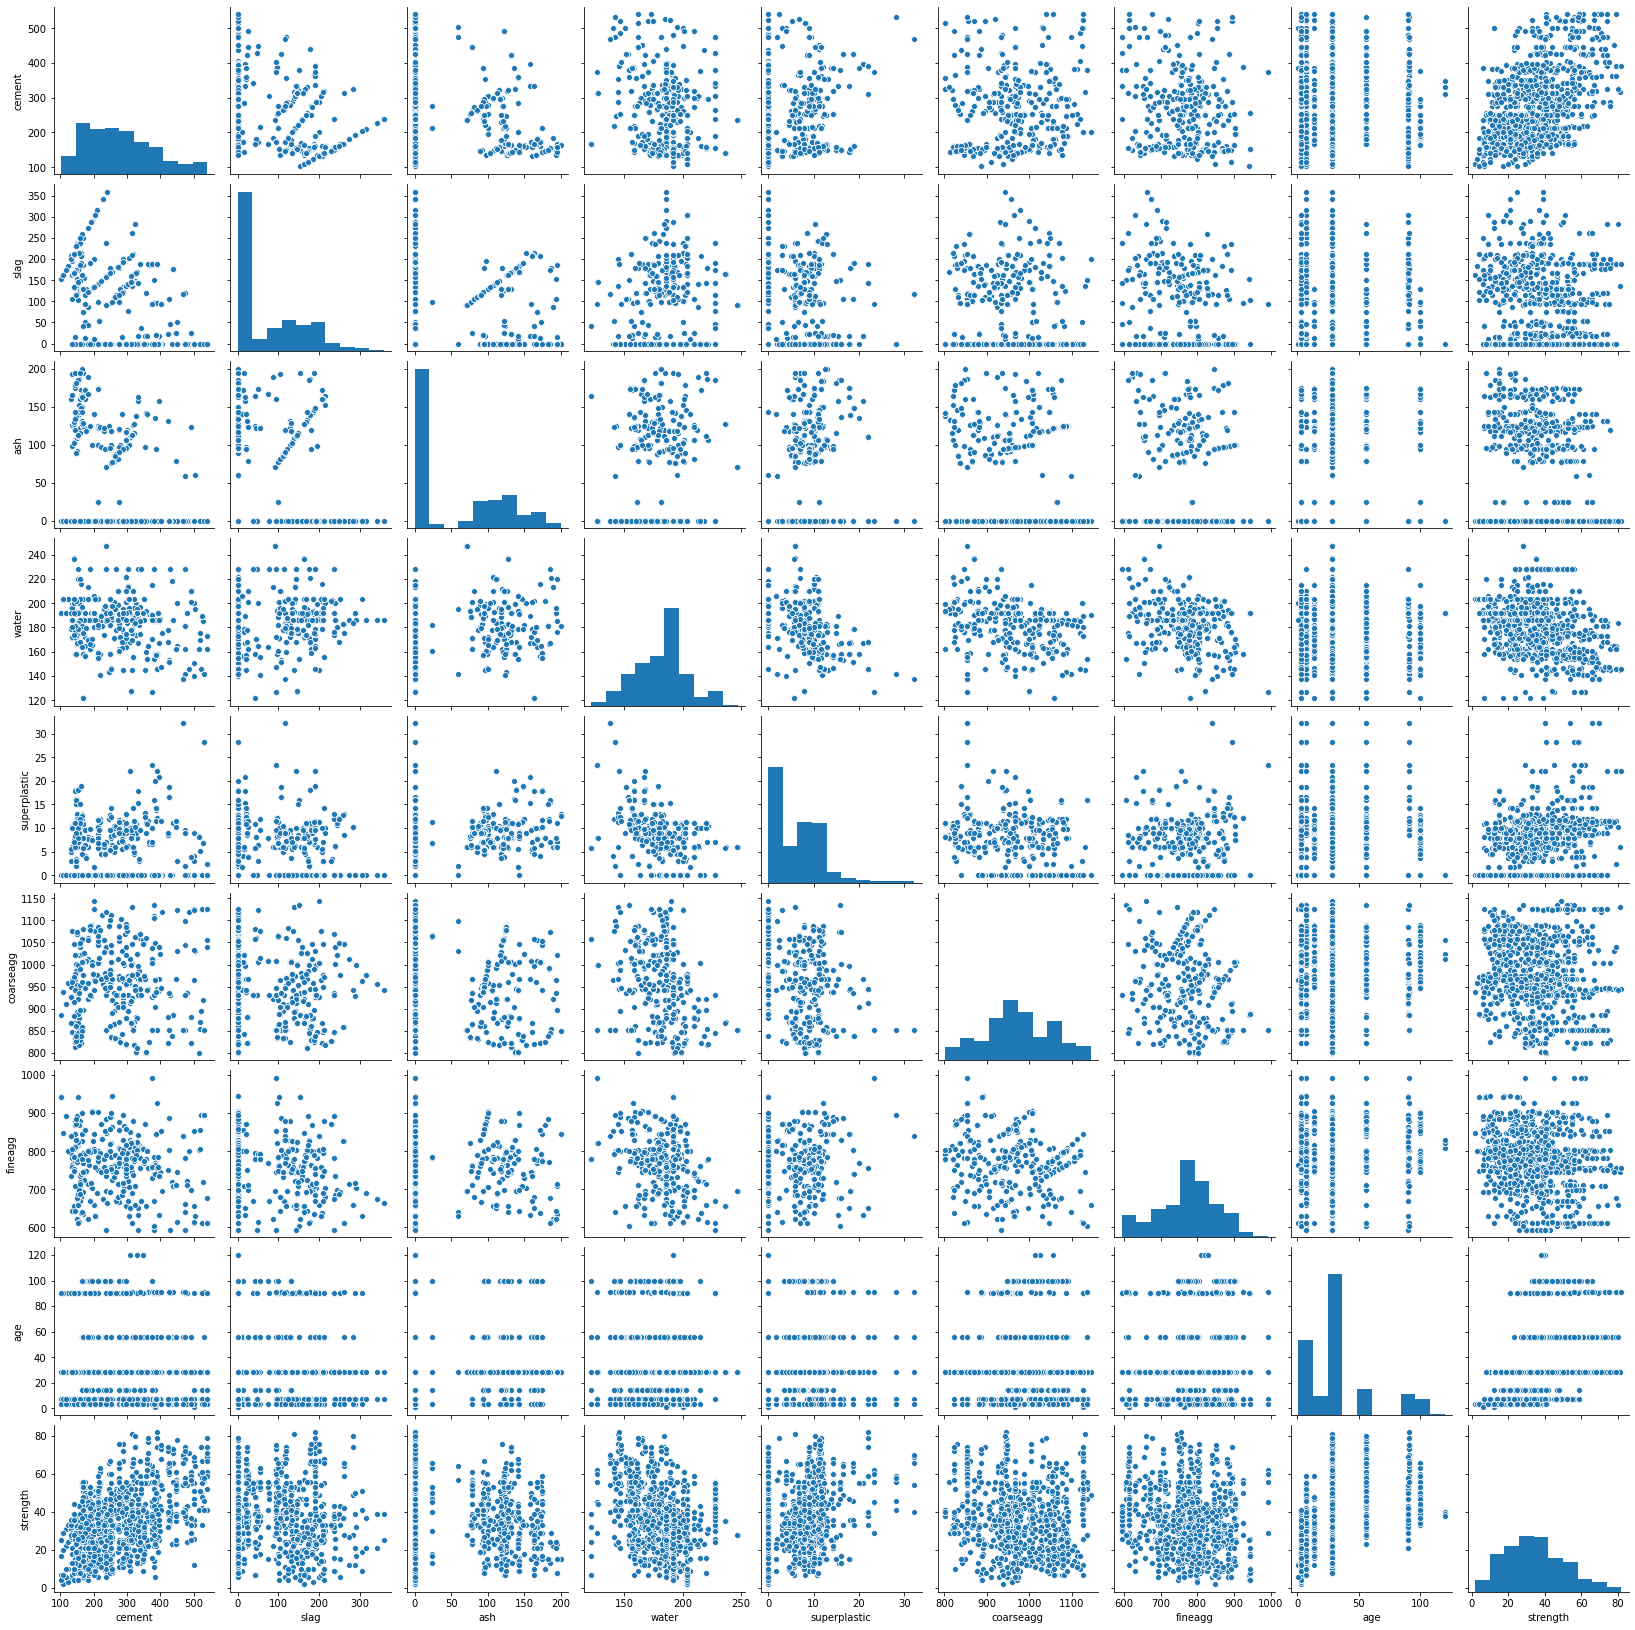

In [288]:
sns.pairplot(data,diag_kind='hist')

In [461]:
#strength, fineagg, coarseagg, water, and cement seem to be normally distributed.
#lots of zeros for slag and ash
#Variables seem to be independent from each other.
#If modelling goes bad i might go and make the non-normal distributions more symmetricall (so there is less bias towards 0)

In [462]:
data.corr()['strength'] #seems to be a bit of correlation with cement and age. 

cement          0.488283
slag            0.103374
ash            -0.080648
water          -0.269624
superplastic    0.344209
coarseagg      -0.144717
fineagg        -0.186448
age             0.498530
strength        1.000000
Name: strength, dtype: float64

In [463]:
data['fine*coarse'] = data.fineagg*data.coarseagg

In [464]:
data['slag*superplastic'] = data.slag*data.superplastic #new columns

In [465]:
data.corr()['strength'] #new features do better than old ones

cement               0.488283
slag                 0.103374
ash                 -0.080648
water               -0.269624
superplastic         0.344209
coarseagg           -0.144717
fineagg             -0.186448
age                  0.498530
strength             1.000000
fine*coarse         -0.267507
slag*superplastic    0.349405
Name: strength, dtype: float64

In [466]:
x = data.drop('strength',axis=1)
y = data.strength

In [467]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
test_size = 0.30
seed = 2 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [468]:
x_train.shape,x_test.shape

((703, 10), (302, 10))

In [487]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=num_folds, random_state=seed)

/Users/leongarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [491]:
algo= []
tr = []
te = []
r2 = []
mae = []
cv = []

In [492]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

algo.append('Gradient Boosting')
tr.append(model.score(x_train, y_train))
te.append(model.score(x_test, y_test))
r2.append(r2_score(y_test, model.predict(x_test)))
mae.append(mean_absolute_error(y_test, model.predict(x_test)))
cv.append(cross_val_score(model, x, y, cv = 10).mean())


pd.Series(model.feature_importances_, x_train.columns ).sort_values(ascending= False)

age                  0.358296
cement               0.322494
water                0.110496
slag*superplastic    0.048553
fine*coarse          0.045442
slag                 0.040078
superplastic         0.029934
fineagg              0.022946
coarseagg            0.011441
ash                  0.010320
dtype: float64

In [493]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

algo.append('Random Forest')
tr.append(model.score(x_train, y_train))
te.append(model.score(x_test, y_test))
r2.append(r2_score(y_test, model.predict(x_test)))
mae.append(mean_absolute_error(y_test, model.predict(x_test)))
cv.append(cross_val_score(model, x, y, cv = 10).mean())

pd.Series(model.feature_importances_, x_train.columns ).sort_values(ascending= False)

cement               0.332768
age                  0.327272
water                0.103002
slag                 0.053405
superplastic         0.049935
fine*coarse          0.035694
slag*superplastic    0.032267
coarseagg            0.026243
fineagg              0.026002
ash                  0.013413
dtype: float64

In [494]:
from sklearn.ensemble import AdaBoostRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

algo.append('Ada Boost')
tr.append(model.score(x_train, y_train))
te.append(model.score(x_test, y_test))
r2.append(r2_score(y_test, model.predict(x_test)))
mae.append(mean_absolute_error(y_test, model.predict(x_test)))
cv.append(cross_val_score(model, x, y, cv = 10).mean())



pd.Series(model.feature_importances_, x_train.columns ).sort_values(ascending= False)

cement               0.329106
age                  0.323253
water                0.111158
slag                 0.048216
superplastic         0.045882
slag*superplastic    0.037438
fine*coarse          0.036673
fineagg              0.029213
coarseagg            0.025730
ash                  0.013330
dtype: float64

In [495]:
#all models seem to be depending heavily on cement and age for their predictions. I will consider dropping the other features to see if the accuracy increases.

In [496]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['R2'] = r2
results['MeanAbsError'] = mae
results['Cross_validation'] = cv
results = results.set_index('Model')
results

,Training Score,Testing Score,R2,MeanAbsError,Cross_validation
Model,,,,,
Gradient Boosting,0.942522,0.890784,0.890784,4.233720,0.890270
Random Forest,0.978799,0.883956,0.883956,4.202021,0.899045
Ada Boost,0.979597,0.884321,0.884321,4.226830,0.898720


In [ ]:
#even without model tuning the models are doing well

In [477]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [486]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(model, x, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9001515531723756


In [498]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(x, y)

clf.best_params_



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   22.9s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [502]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 20,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


score7 = cross_val_score(rf, x, y, cv = 5).mean()


score7

0.8919629561556717

In [503]:
results

,Training Score,Testing Score,R2,MeanAbsError,Cross_validation
Model,,,,,
Gradient Boosting,0.942522,0.890784,0.890784,4.233720,0.890270
Random Forest,0.978799,0.883956,0.883956,4.202021,0.899045
Ada Boost,0.979597,0.884321,0.884321,4.226830,0.898720


In [ ]:
#The gradientBoost or the Random Forest seem to be the best models